In [1]:
from ipywidgets import Layout, Label, VBox, interact, fixed, FloatSlider, HTML

from ipyleaflet import Map, Choropleth, LayerGroup, LayersControl, basemaps, basemap_to_tiles, Popup
import geopandas
import numpy as np
import json
from branca.colormap import linear
import pandas as pd

import map_methods
import math

In [2]:
covid_mk_cities = geopandas.read_file("covid.geojson")
scale = np.log2((covid_mk_cities['count'] / (covid_mk_cities['population'] / 2000) + 1))
idd = map(str, covid_mk_cities.index)
covid_active = dict(zip(idd, scale))
covid_mk_cities_geo_json = json.loads(covid_mk_cities.to_json())

In [3]:
covid_hospitals = pd.read_csv('covid_hospitals.csv')
covid_hospitals = covid_hospitals.set_index('hospital')

In [4]:
colors = Choropleth(
    geo_data=covid_mk_cities_geo_json,
    choro_data=covid_active,
    colormap=linear.YlOrRd_04,
    border_color='black',
    style={'fillOpacity': 0.5, 'weight': 0.05},
    hover_style={'fillColor': 'grey' , 'fillOpacity': 0.3, 'weight': 2, 'color': 'green'}
)

hospitals = map_methods.marker_layer(d=covid_hospitals, 
                             cols=["count_x", "count_y", "count"], 
                             names=["Заразени", "Излечени" ,"Мртви"],
                            get_marker=map_methods.get_hospital_marker,
                            hide_marker=map_methods.hide_hospital_marker,
                            lng='Longitude',
                            lat='Latitude')

m = map_methods.get_macedonia_map()
m.add_layer(colors)
m.add_layer(hospitals)
m

Map(center=[41.6086, 21.7453], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

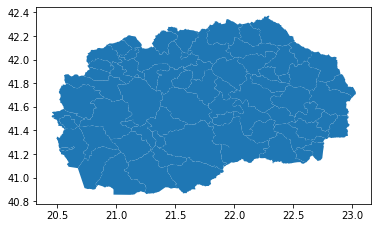

In [5]:
covid_mk_cities.plot()